Импортируем библеотеки

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Загрузка данных

In [4]:
X_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
X_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)

In [5]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [6]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


Объеденим данные 

In [7]:
df = X_bp.join(X_nup, how='inner')
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [9]:
# Подсчет NuN вхождений (пропущенных значений)
df.isnull().sum().sum()

0

In [10]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Оценка данных методом построения гистограмм

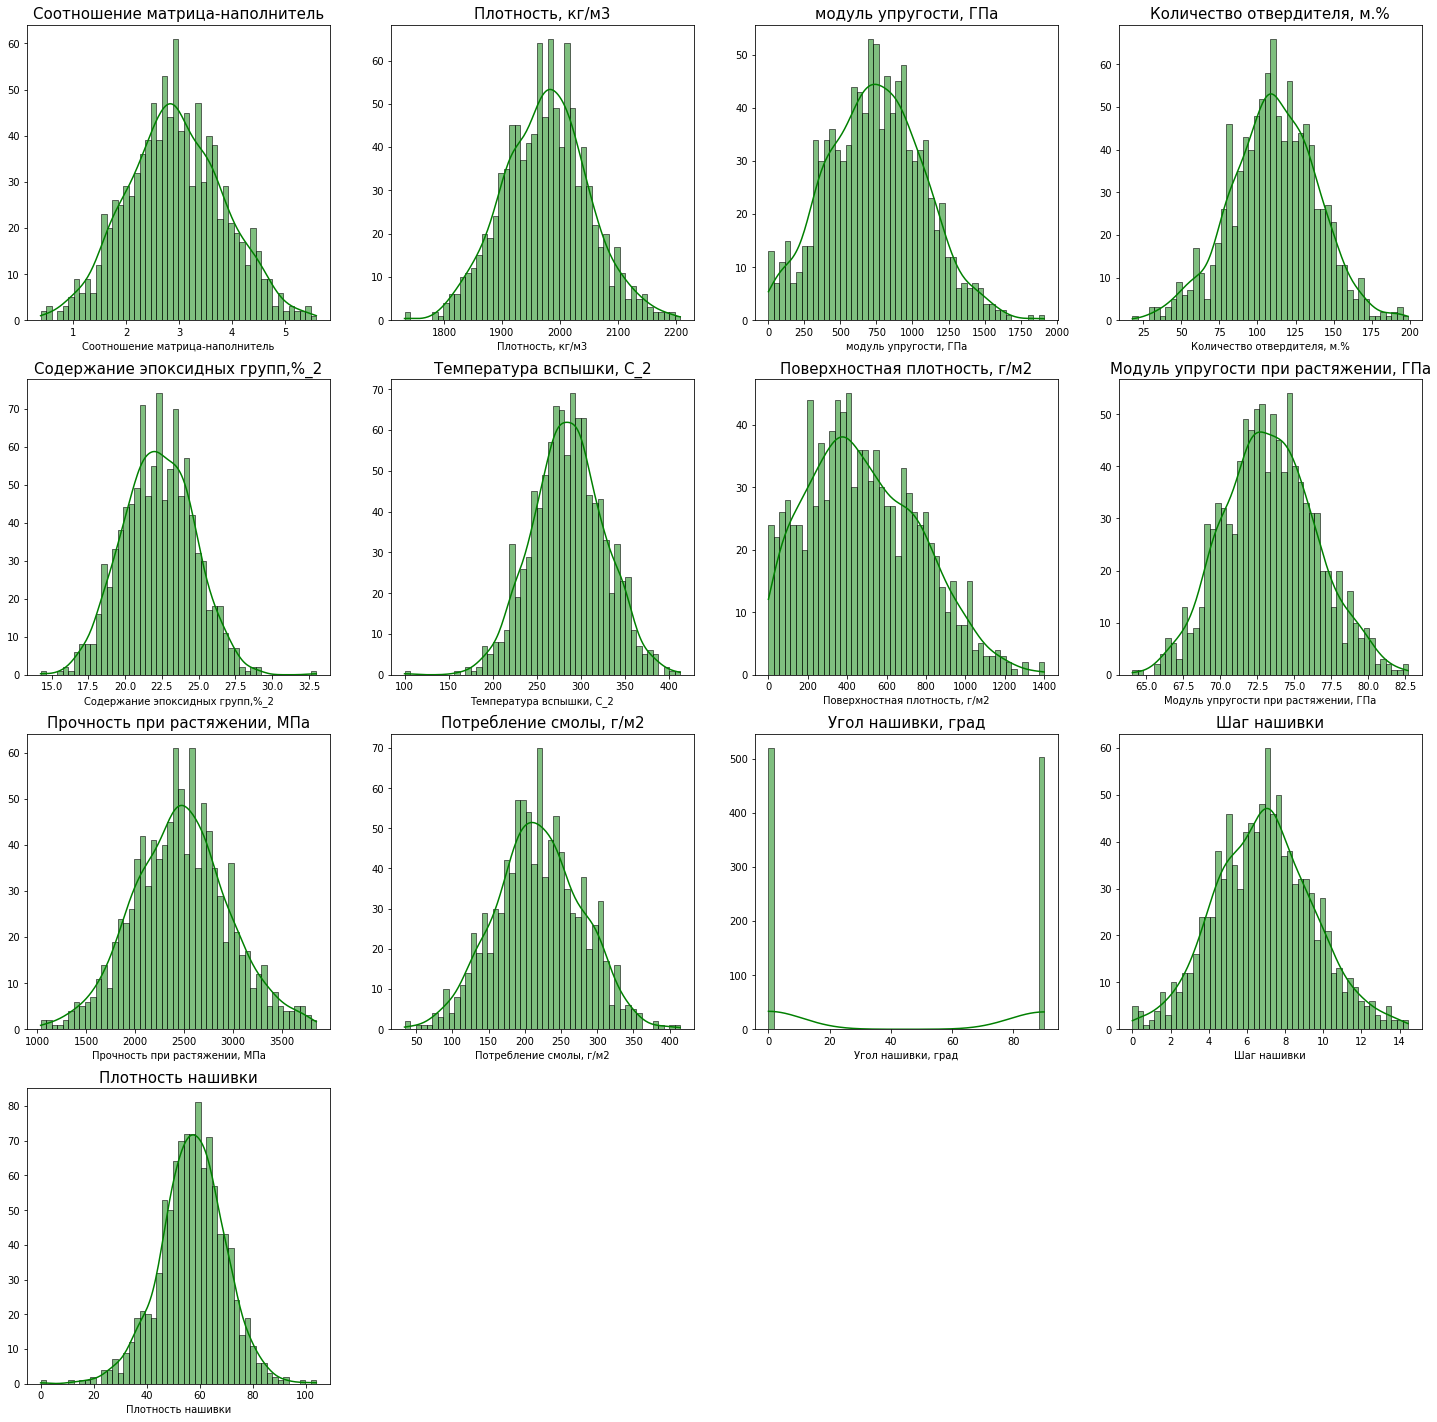

In [11]:
plt.figure(figsize=(25,25))
c = 1
for col in df.columns:
    plt.subplot(4, 4, c)
    sns.histplot(data = df[col], kde=True, color= "g", bins= 50)
    plt.ylabel(None)
    plt.title(col, size = 15)
    c+=1
plt.savefig('gist.png')

Данные имеют нормальное распределение за исключением угол нашивки

Попарные графики рассеяния

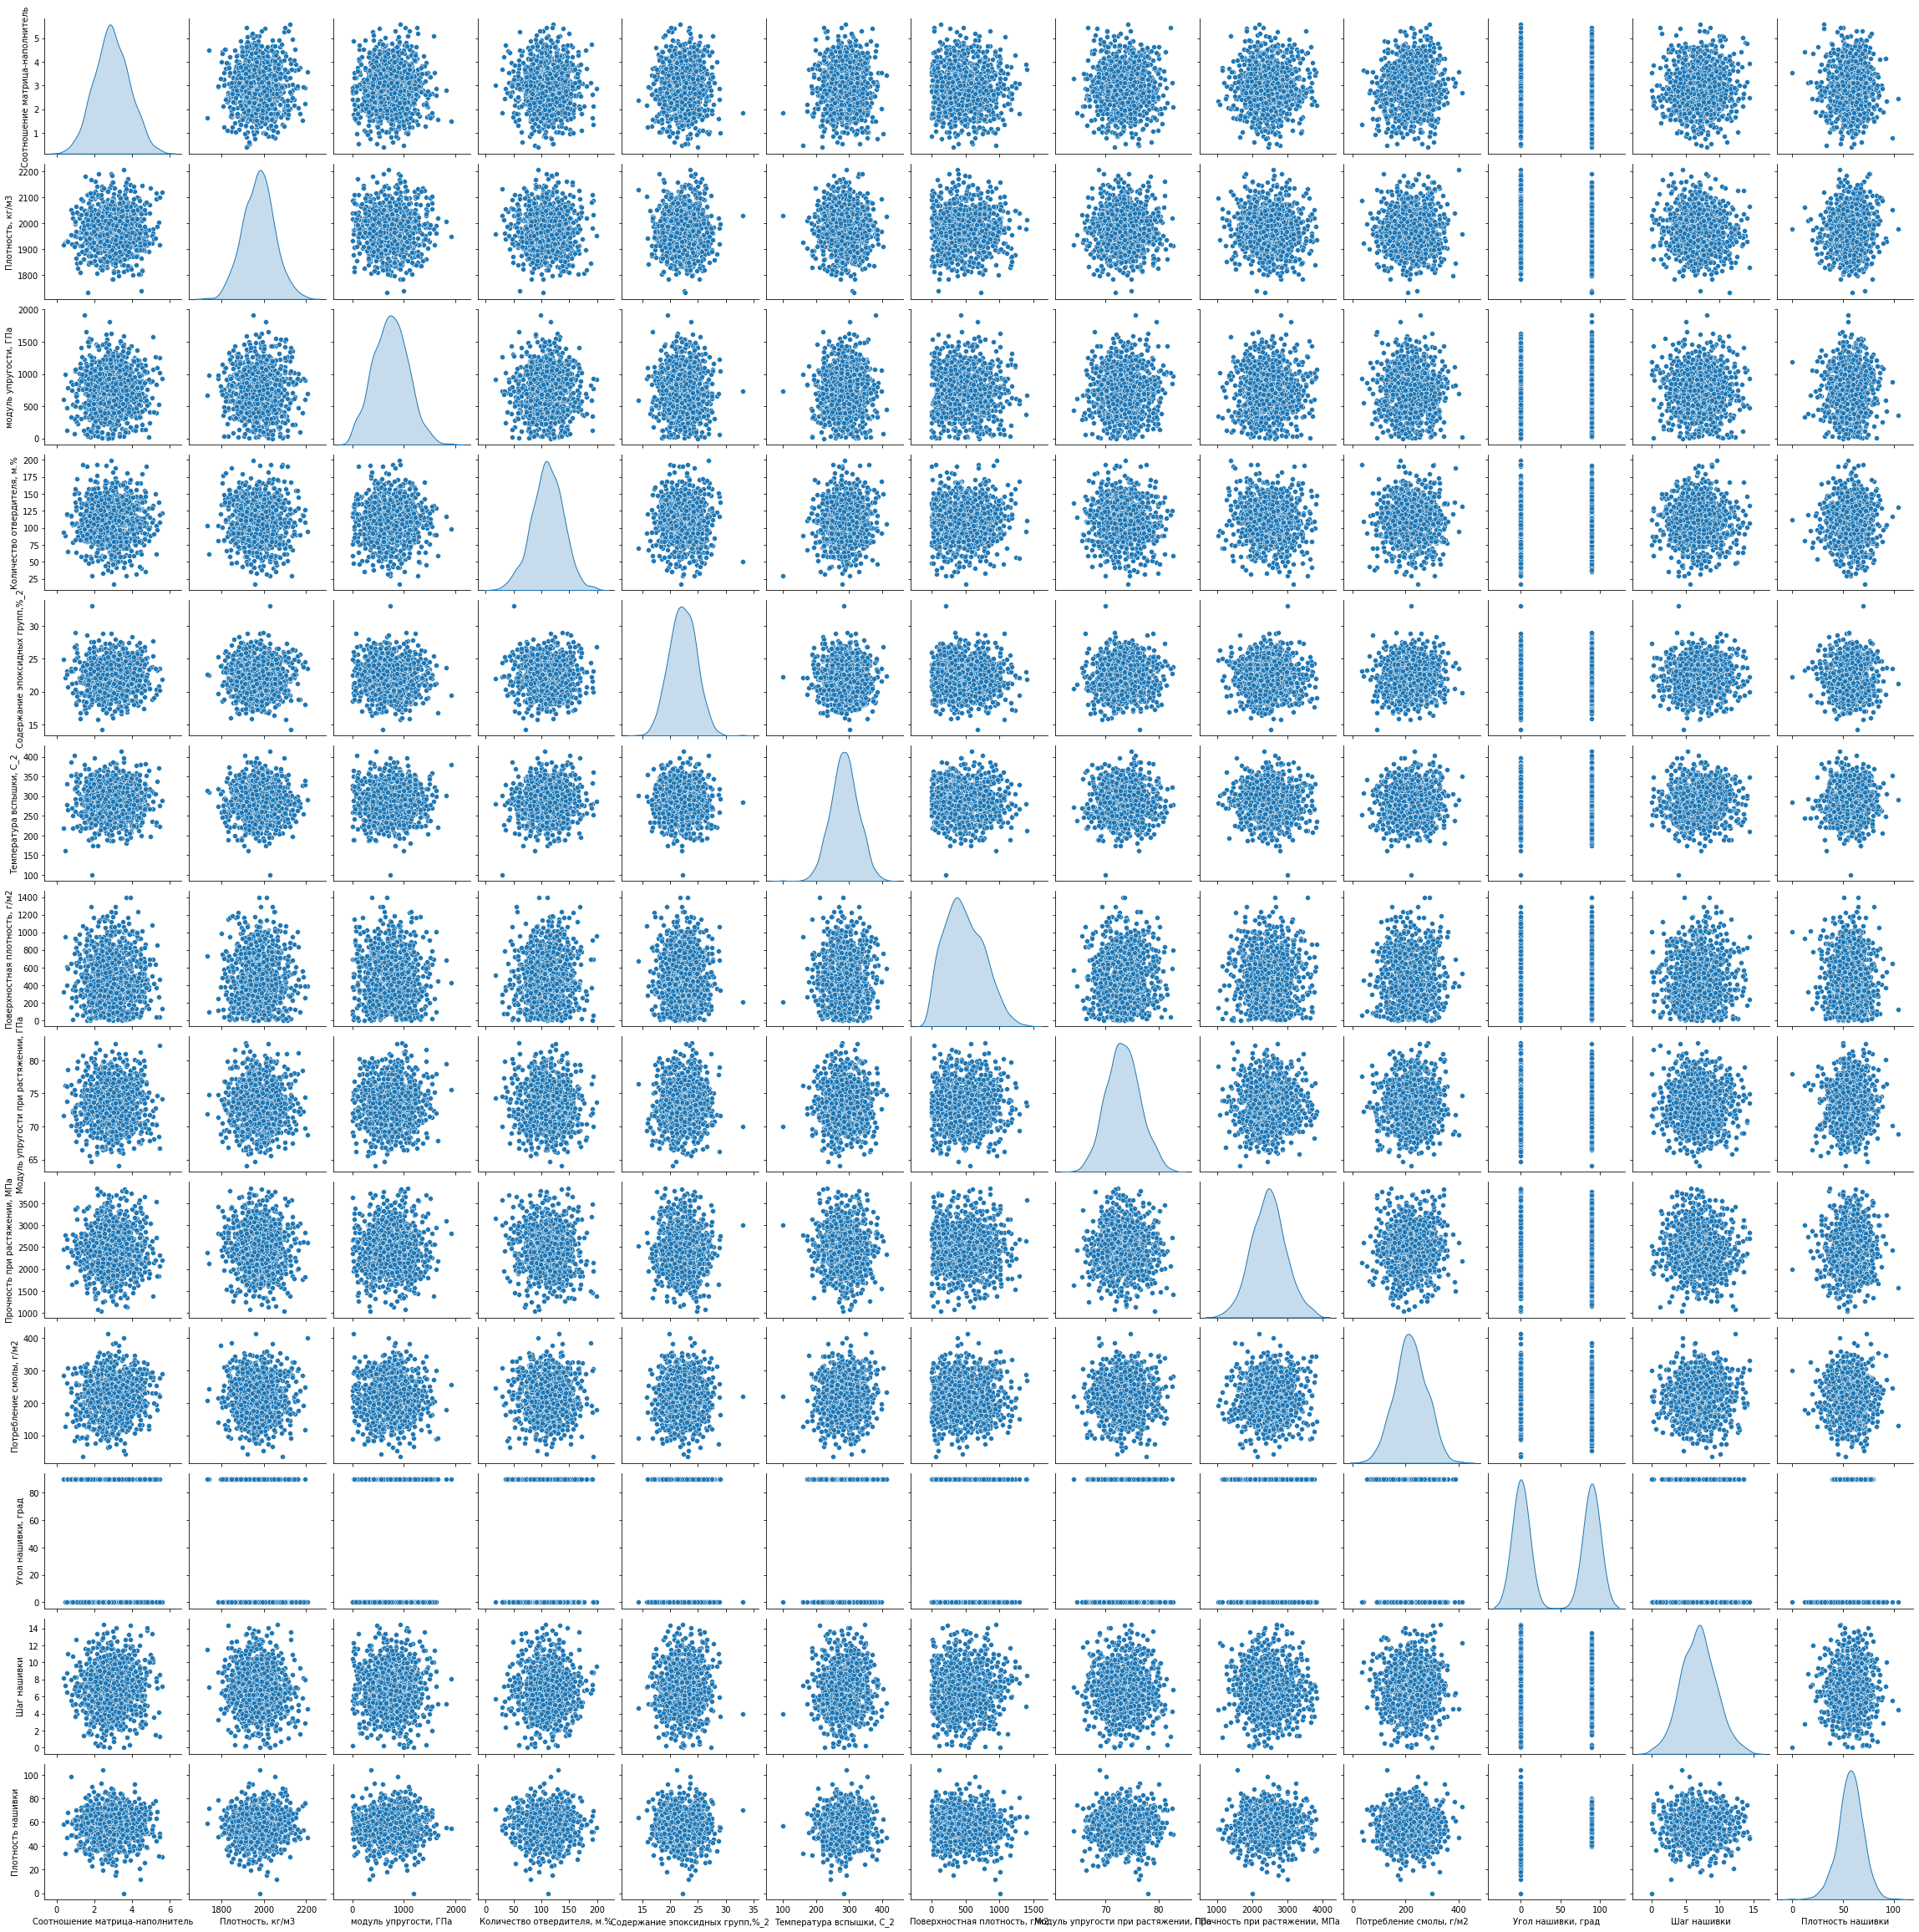

In [12]:
sns.pairplot(df, diag_kind= 'kde', palette='Set6')
plt.savefig('pairplot.png')

Ящик с усами

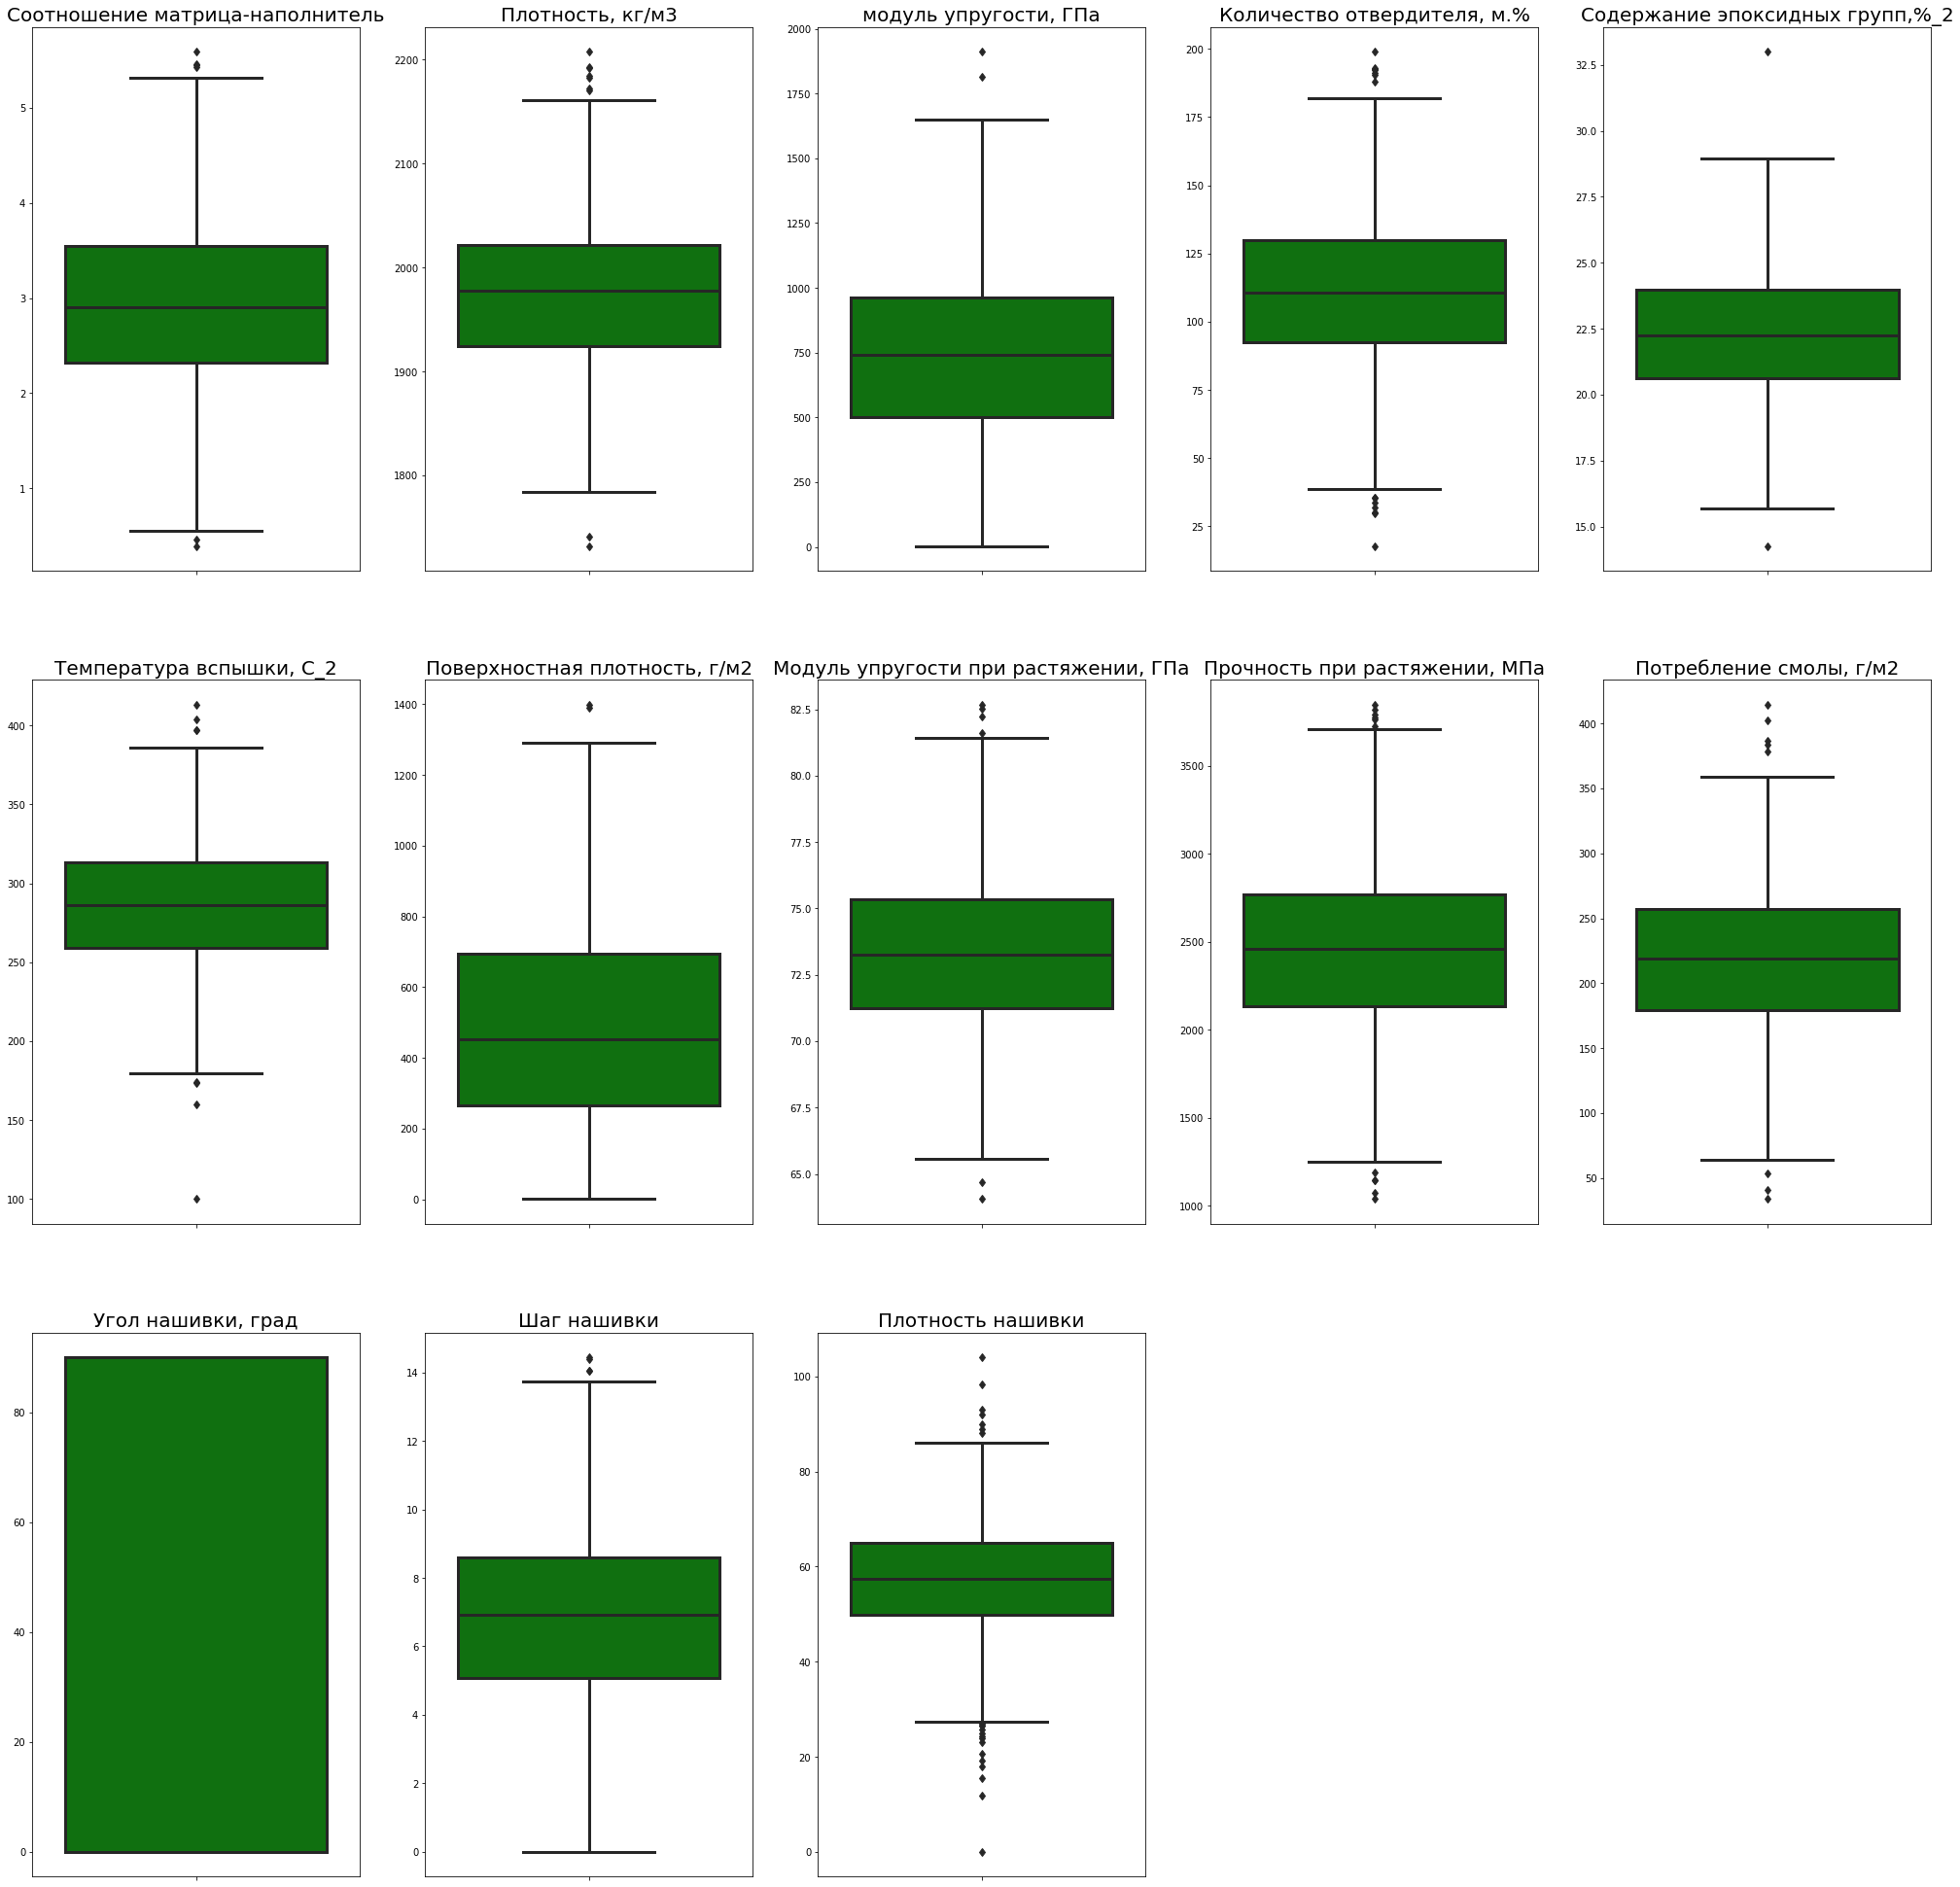

In [13]:
c = 1

plt.figure(figsize=(35,35))

for col in df.columns:
    plt.subplot(3, 5, c)

    sns.boxplot(data = df, y=df[col], fliersize=6, linewidth=3, color= "green")
    plt.ylabel(None)
    plt.title(col, size = 20)

    c+=1
plt.savefig('boxplot.png')

Тепловая карта

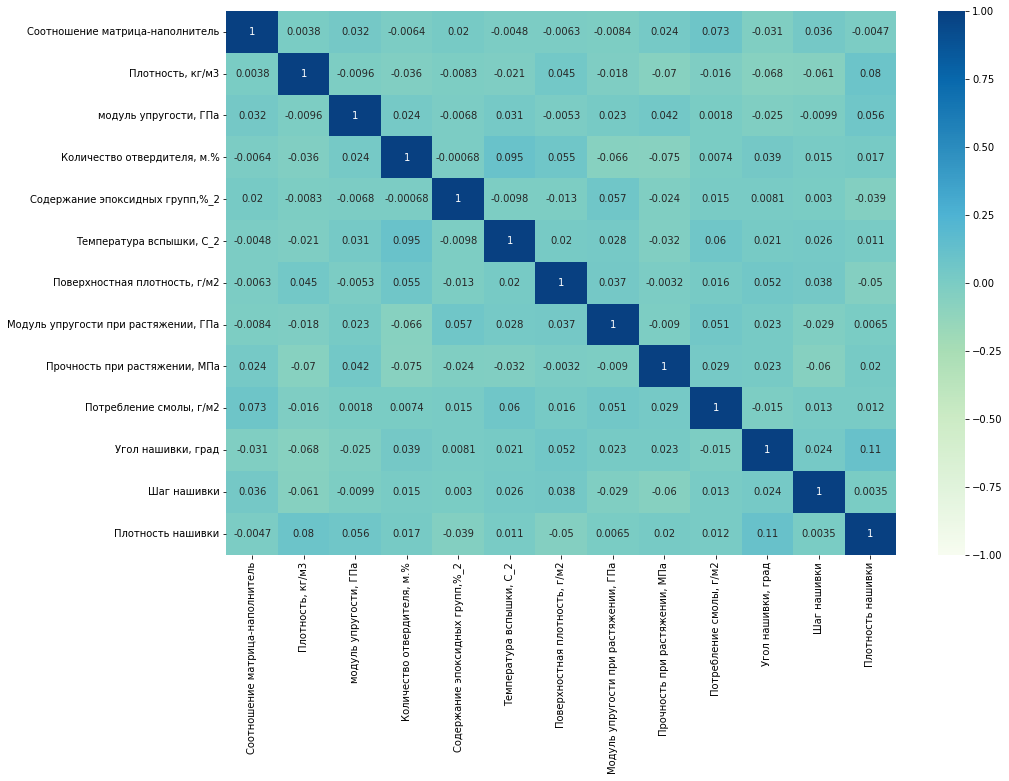

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='GnBu')
plt.savefig('heatmap.png')

Корреляции между переменными на тепловой карте визуально не выявлена

Предобработка данных

Удаление выбросов

Сравним два метода удаления выбросов: 3-х сигм и Межквартильных расстояний

In [15]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)


Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [16]:
df_clean = df[(np.abs(stats.zscore(df)) <= 3).all(axis=1)]

df

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       999 non-null    float64
 1   Плотность, кг/м3                      999 non-null    float64
 2   модуль упругости, ГПа                 999 non-null    float64
 3   Количество отвердителя, м.%           999 non-null    float64
 4   Содержание эпоксидных групп,%_2       999 non-null    float64
 5   Температура вспышки, С_2              999 non-null    float64
 6   Поверхностная плотность, г/м2         999 non-null    float64
 7   Модуль упругости при растяжении, ГПа  999 non-null    float64
 8   Прочность при растяжении, МПа         999 non-null    float64
 9   Потребление смолы, г/м2               999 non-null    float64
 10  Угол нашивки, град                    999 non-null    int64  
 11  Шаг нашивки       

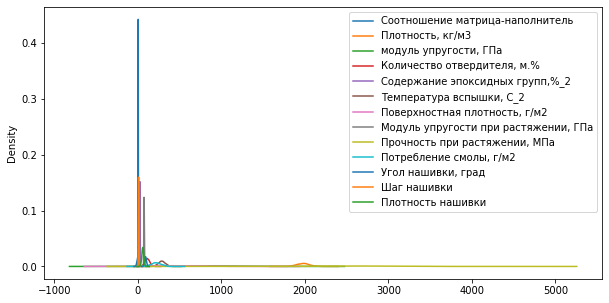

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
df_clean.plot(kind='kde', ax=ax)
plt.savefig('dens.png')

Видно, что данные находятся в разных диапазонах.

Нормализация данных, MinMaxScaler

In [19]:
scaler = MinMaxScaler()

df_norm=pd.DataFrame(scaler.fit_transform(df_clean),
            columns=df_clean.columns, index=df_clean.index) 
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.282131          0.601381   
3                            0.282131          0.601381   
4                            0.457857          0.601381   
5                            0.457201          0.527898   
6                            0.419084          0.307448   
...                               ...               ...   
1018                         0.361750          0.410540   
1019                         0.587163          0.650588   
1020                         0.555750          0.460227   
1021                         0.637396          0.691520   
1022                         0.657131          0.259472   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.447061                     0.123047   
3                  0.447061                     0.608021   
4                  0.455721                     0.502800   
5                  0.452685                     0.502800   
6                  0.488508                     0.502800   
...                     ...                          ...   
1018               0.552781                     0.350139   
1019               0.268550                     0.712271   
1020               0.251612                     0.494656   
1021               0.448724                     0.684130   
1022               0.251903                     0.609147   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.482823   
3                            0.418887                  0.549664   
4                            0.495653                  0.482823   
5                            0.495653                  0.482823   
6                            0.495653                  0.482823   
...                               ...                       ...   
1018                         0.333908                  0.657301   
1019                         0.294428                  0.350746   
1020                         0.623085                  0.325580   
1021                         0.267818                  0.444436   
1022                         0.888354                  0.553803   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.162230                              0.321894   
3                          0.162230                              0.321894   
4                          0.162230                              0.321894   
5                          0.162230                              0.321894   
6                          0.162230                              0.321894   
...                             ...                                   ...   
1018                       0.161609                              0.489229   
1019                       0.271207                              0.480019   
1020                       0.572959                              0.578197   
1021                       0.496511                              0.540754   
1022                       0.587373                              0.555208   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                          0.698235                 0.517418   
3                          0.698235                 0.517418   
4                          0.698235                 0.517418   
5                          0.698235                 0.517418   
6                          0.698235                 0.517418   
...                             ...                      ...   
1018                       0.480312                 0.242759   
1019                       0.470745                 0.221717   
1020                       0.578340                 0.565435   
1021                       0.368070                 0.451281   
1022                       0.647135                 0.444423   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [20]:
df_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       999.0  0.489727  0.174701  0.0   
Плотность, кг/м3                      999.0  0.467798  0.178722  0.0   
модуль упругости, ГПа                 999.0  0.446887  0.198929  0.0   
Количество отвердителя, м.%           999.0  0.496747  0.170875  0.0   
Содержание эпоксидных групп,%_2       999.0  0.493097  0.179869  0.0   
Температура вспышки, С_2              999.0  0.488685  0.174877  0.0   
Поверхностная плотность, г/м2         999.0  0.371058  0.215125  0.0   
Модуль упругости при растяжении, ГПа  999.0  0.501023  0.167891  0.0   
Прочность при растяжении, МПа         999.0  0.508273  0.172193  0.0   
Потребление смолы, г/м2               999.0  0.512182  0.170414  0.0   
Угол нашивки, град                    999.0  0.496496  0.500238  0.0   
Шаг нашивки                           999.0  0.477203  0.177675  0.0   
Плотность нашивки                     999.0  0.507132  0.163683  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371306  0.484288  0.608487  1.0  
Плотность, кг/м3                      0.341020  0.472391  0.579760  1.0  
модуль упругости, ГПа                 0.302135  0.448458  0.581067  1.0  
Количество отвердителя, м.%           0.384427  0.495616  0.613450  1.0  
Содержание эпоксидных групп,%_2       0.368588  0.492051  0.624540  1.0  
Температура вспышки, С_2              0.371822  0.488391  0.606296  1.0  
Поверхностная плотность, г/м2         0.206249  0.348503  0.534748  1.0  
Модуль упругости при растяжении, ГПа  0.389296  0.496176  0.610020  1.0  
Прочность при растяжении, МПа         0.390683  0.504890  0.613078  1.0  
Потребление смолы, г/м2               0.401086  0.512933  0.625356  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.351355  0.478419  0.593879  1.0  
Плотность нашивки                     0.405778  0.510118  0.612960  1.0

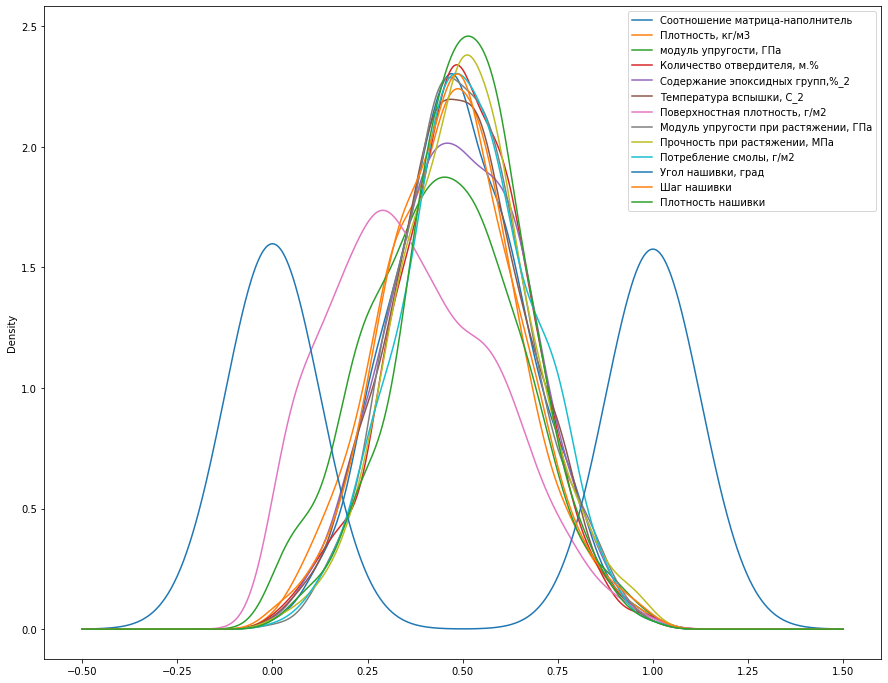

In [21]:
fig, ax = plt.subplots(figsize=(15, 12))
df_norm.plot(kind='kde', ax=ax)
plt.savefig('dens_norm.png')

In [22]:
df_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       999.0  0.489727  0.174701  0.0   
Плотность, кг/м3                      999.0  0.467798  0.178722  0.0   
модуль упругости, ГПа                 999.0  0.446887  0.198929  0.0   
Количество отвердителя, м.%           999.0  0.496747  0.170875  0.0   
Содержание эпоксидных групп,%_2       999.0  0.493097  0.179869  0.0   
Температура вспышки, С_2              999.0  0.488685  0.174877  0.0   
Поверхностная плотность, г/м2         999.0  0.371058  0.215125  0.0   
Модуль упругости при растяжении, ГПа  999.0  0.501023  0.167891  0.0   
Прочность при растяжении, МПа         999.0  0.508273  0.172193  0.0   
Потребление смолы, г/м2               999.0  0.512182  0.170414  0.0   
Угол нашивки, град                    999.0  0.496496  0.500238  0.0   
Шаг нашивки                           999.0  0.477203  0.177675  0.0   
Плотность нашивки                     999.0  0.507132  0.163683  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371306  0.484288  0.608487  1.0  
Плотность, кг/м3                      0.341020  0.472391  0.579760  1.0  
модуль упругости, ГПа                 0.302135  0.448458  0.581067  1.0  
Количество отвердителя, м.%           0.384427  0.495616  0.613450  1.0  
Содержание эпоксидных групп,%_2       0.368588  0.492051  0.624540  1.0  
Температура вспышки, С_2              0.371822  0.488391  0.606296  1.0  
Поверхностная плотность, г/м2         0.206249  0.348503  0.534748  1.0  
Модуль упругости при растяжении, ГПа  0.389296  0.496176  0.610020  1.0  
Прочность при растяжении, МПа         0.390683  0.504890  0.613078  1.0  
Потребление смолы, г/м2               0.401086  0.512933  0.625356  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.351355  0.478419  0.593879  1.0  
Плотность нашивки                     0.405778  0.510118  0.612960  1.0

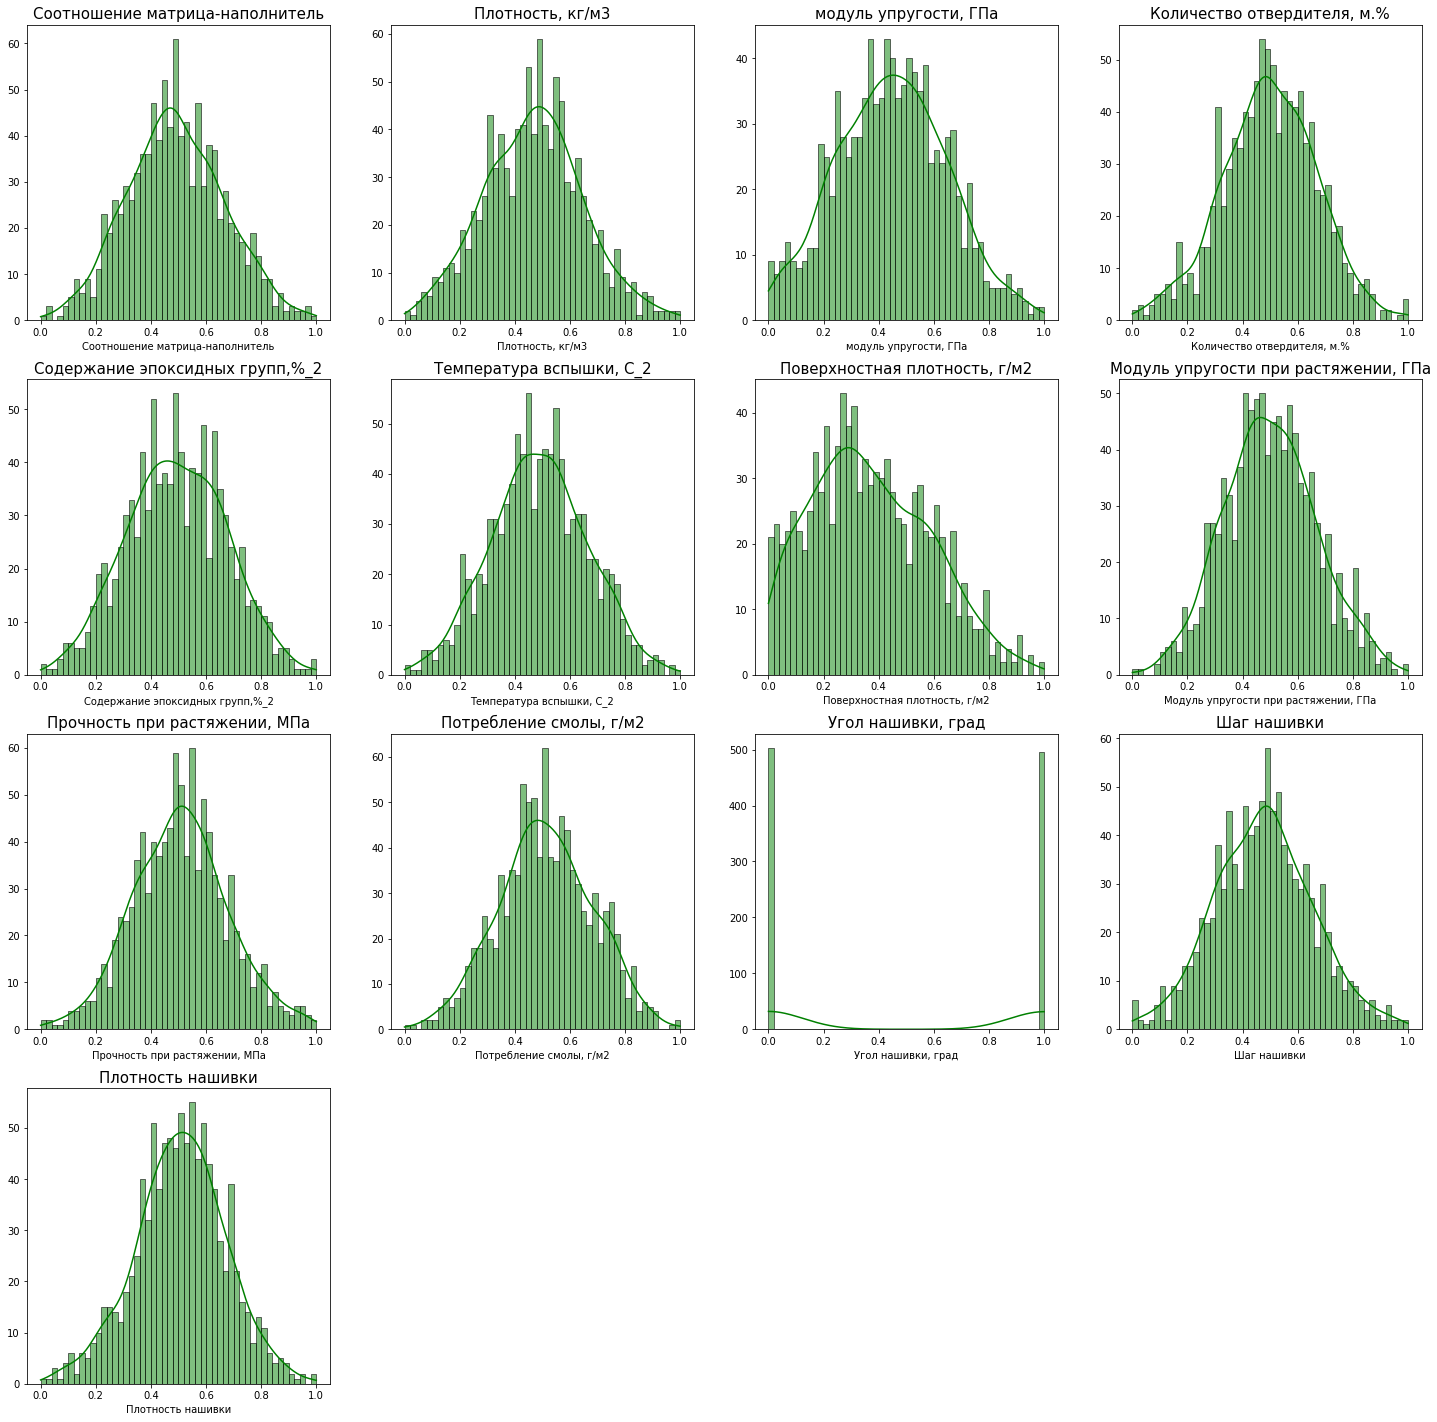

In [23]:
plt.figure(figsize=(25,25))
c = 1
for col in df_norm.columns:
    plt.subplot(4, 4, c)
    sns.histplot(data = df_norm[col], kde=True, color= "g", bins= 50)
    plt.ylabel(None)
    plt.title(col, size = 15)
    c+=1
plt.savefig('gist_norm.png')

## Обучение нескольких моделей для прогноза модуля упругости при растяжение и прочности при растяжении. 

In [24]:
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.282131          0.601381   
3                            0.282131          0.601381   
4                            0.457857          0.601381   
5                            0.457201          0.527898   
6                            0.419084          0.307448   
...                               ...               ...   
1018                         0.361750          0.410540   
1019                         0.587163          0.650588   
1020                         0.555750          0.460227   
1021                         0.637396          0.691520   
1022                         0.657131          0.259472   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.447061                     0.123047   
3                  0.447061                     0.608021   
4                  0.455721                     0.502800   
5                  0.452685                     0.502800   
6                  0.488508                     0.502800   
...                     ...                          ...   
1018               0.552781                     0.350139   
1019               0.268550                     0.712271   
1020               0.251612                     0.494656   
1021               0.448724                     0.684130   
1022               0.251903                     0.609147   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.482823   
3                            0.418887                  0.549664   
4                            0.495653                  0.482823   
5                            0.495653                  0.482823   
6                            0.495653                  0.482823   
...                               ...                       ...   
1018                         0.333908                  0.657301   
1019                         0.294428                  0.350746   
1020                         0.623085                  0.325580   
1021                         0.267818                  0.444436   
1022                         0.888354                  0.553803   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.162230                              0.321894   
3                          0.162230                              0.321894   
4                          0.162230                              0.321894   
5                          0.162230                              0.321894   
6                          0.162230                              0.321894   
...                             ...                                   ...   
1018                       0.161609                              0.489229   
1019                       0.271207                              0.480019   
1020                       0.572959                              0.578197   
1021                       0.496511                              0.540754   
1022                       0.587373                              0.555208   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                          0.698235                 0.517418   
3                          0.698235                 0.517418   
4                          0.698235                 0.517418   
5                          0.698235                 0.517418   
6                          0.698235                 0.517418   
...                             ...                      ...   
1018                       0.480312                 0.242759   
1019                       0.470745                 0.221717   
1020                       0.578340                 0.565435   
1021                       0.368070                 0.451281   
1022                       0.647135                 0.444423   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [25]:
#Входные данные
X_u = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
X_p = df_norm.drop(['Прочность при растяжении, МПа'], axis=1)
#выходные переменные
Y_u = df_norm[['Модуль упругости при растяжении, ГПа']]
Y_p = df_norm[['Прочность при растяжении, МПа']]

In [26]:
#тестовая и обучающая выборки 70/30
X_train_u, X_test_u, Y_train_u, Y_test_u = train_test_split(X_u, Y_u, test_size=0.3)
X_train_p, X_test_p, Y_train_p, Y_test_p = train_test_split(X_p, Y_p, test_size=0.3)

, random_state=1

In [27]:
print("Размер тренировочного датасета на входе:", X_train_u.shape)
print("Размер тестового датасета на входе:", X_test_u.shape)
print("Размер тренировочного датасета на выходе:", Y_train_u.shape)
print("Размертестового датасета на выходе:", Y_test_u.shape)
print("Размер тренировочного датасета на входе:", X_train_p.shape)
print("Размер тестового датасета на входе:", X_test_p.shape)
print("Размер тренировочного датасета на выходе:", Y_train_p.shape)
print("Размертестового датасета на выходе:", Y_test_p.shape)

Размер тренировочного датасета на входе: (699, 12)
Размер тестового датасета на входе: (300, 12)
Размер тренировочного датасета на выходе: (699, 1)
Размертестового датасета на выходе: (300, 1)
Размер тренировочного датасета на входе: (699, 12)
Размер тестового датасета на входе: (300, 12)
Размер тренировочного датасета на выходе: (699, 1)
Размертестового датасета на выходе: (300, 1)


## модуль упругости при растяжение

RandomForestRegressor Случайный лес

In [28]:
#Модуль упругости при растяжении
RFR_model = RandomForestRegressor(random_state=14, n_jobs=-1)
RFR_model_params = {
    'n_estimators' : range(10, 51, 10),
    'max_depth' : range(2, 5, 10),
    'min_samples_split': range(2, 10, 2),
    'min_samples_leaf': range(1, 8),
    'criterion':['squared_error']
}
GSCV_RFR_model_u = GridSearchCV(RFR_model, RFR_model_params, cv=10, verbose=2, n_jobs=-1)
GSCV_RFR_model_u.fit(X_train_u,  np.ravel(Y_train_u))
RFR_model_u = GSCV_RFR_model_u.best_estimator_
MSE = mean_squared_error(Y_test_u, RFR_model_u.predict(X_test_u))
R2 = r2_score(Y_test_u, RFR_model_u.predict(X_test_u))
result = pd.DataFrame({
   'Model': 'RandomForestRegressor', 
   'MSE': MSE, 
   'R2 score': R2
}, index=['Модуль упругости при растяжении'])
GSCV_RFR_model_u.best_params_

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


{'criterion': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 20}

In [29]:
# добавим в дф
models = pd.DataFrame()
models = pd.concat([models, result])

LinearRegression Линейная регрессия

In [30]:
#Модуль упругости при растяжении
LR = LinearRegression()
LR_model_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_LR_model_u = GridSearchCV(LR, LR_model_params, cv=10, verbose=2, n_jobs=-1)
GSCV_LR_model_u.fit(X_train_u, Y_train_u)
LR_model_u = GSCV_LR_model_u.best_estimator_
MSE = mean_squared_error(Y_test_u, LR_model_u.predict(X_test_u))
R2 = r2_score(Y_test_u, LR_model_u.predict(X_test_u))
result = pd.DataFrame({
   'Model': 'LinearRegression', 
   'MSE': MSE, 
   'R2 score': R2
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, result])
GSCV_LR_model_u.best_params_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


{'fit_intercept': 'True'}

KNeighborsRegressor Регрессия k-ближайших соседей

In [31]:
#Модуль упругости при растяжении
KNR = KNeighborsRegressor()
KNR_model_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_KNR_model_u = GridSearchCV(KNR, KNR_model_params, verbose=2, n_jobs=-1, cv=10)
GSCV_KNR_model_u.fit(X_train_u, Y_train_u)
KNR_model_u = GSCV_KNR_model_u.best_estimator_
MSE = mean_squared_error(Y_test_u, KNR_model_u.predict(X_test_u))
R2 = r2_score(Y_test_u, KNR_model_u.predict(X_test_u))
result = pd.DataFrame({
   'Model': 'KNeighborsRegressor', 
   'MSE': MSE, 
   'R2 score': R2
}, index=['Модуль упругости при растяжении'])
models = pd.concat([models, result])
GSCV_KNR_model_u.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 139, 'weights': 'uniform'}

In [32]:
def model_plot(Y, Y_pr, var, model_name ):    
    plt.figure(figsize=(10,3.7))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(Y, label='Тест', color='g')
    plt.plot(Y_pr, label='Прогноз', color='r')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()

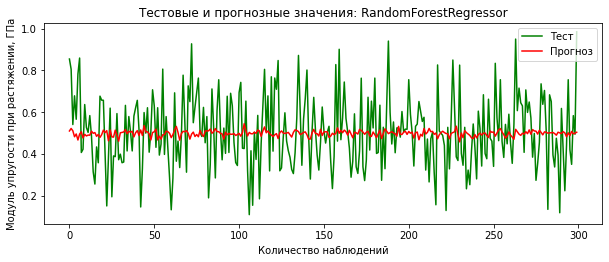

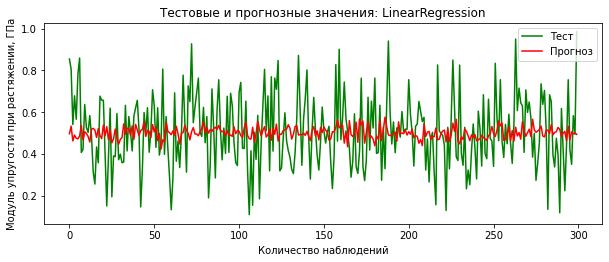

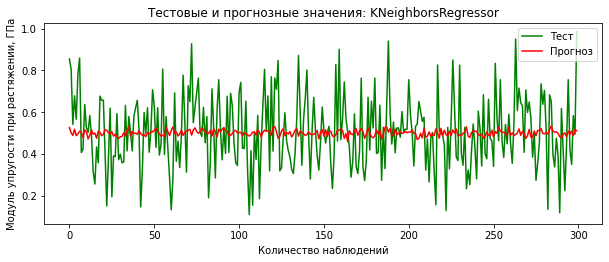

In [33]:
model_plot(Y_test_u.values, RFR_model_u.predict(X_test_u), 'Модуль упругости при растяжении, ГПа', 'RandomForestRegressor')
model_plot(Y_test_u.values, LR_model_u.predict(X_test_u), 'Модуль упругости при растяжении, ГПа', 'LinearRegression')
model_plot(Y_test_u.values, KNR_model_u.predict(X_test_u), 'Модуль упругости при растяжении, ГПа', 'KNeighborsRegressor')

## Прочность при растяжение

RandomForestRegressor Случайный лес

In [34]:
#Прочность при растяжении
RFR_model = RandomForestRegressor(random_state=14, n_jobs=-1)
RFR_model_params = {
    'n_estimators' : range(10, 51, 10),
    'max_depth' : range(2, 5, 10),
    'min_samples_split': range(2, 10, 2),
    'min_samples_leaf': range(1, 8),
    'criterion':['squared_error']
}
GSCV_RFR_model_p = GridSearchCV(RFR_model, RFR_model_params, cv=10, verbose=2, n_jobs=-1)
GSCV_RFR_model_p.fit(X_train_p,  np.ravel(Y_train_p))
RFR_model_p = GSCV_RFR_model_p.best_estimator_
MSE = mean_squared_error(Y_test_p, RFR_model_p.predict(X_test_p))
R2 = r2_score(Y_test_p, RFR_model_p.predict(X_test_p))
result = pd.DataFrame({
   'Model': 'RandomForestRegressor', 
   'MSE': MSE, 
   'R2 score': R2
}, index=['Прочность при растяжении'])
models = pd.concat([models, result])
GSCV_RFR_model_p.best_params_

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


{'criterion': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

LinearRegression Линейная регрессия

In [35]:
#Прочность при растяжении
LR = LinearRegression()
LR_model_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_LR_model_p = GridSearchCV(LR, LR_model_params, cv=10, verbose=2, n_jobs=-1)
GSCV_LR_model_p.fit(X_train_p, Y_train_p)
LR_model_p = GSCV_LR_model_p.best_estimator_
MSE = mean_squared_error(Y_test_p, LR_model_p.predict(X_test_p))
R2 = r2_score(Y_test_p, LR_model_p.predict(X_test_p))
result = pd.DataFrame({
   'Model': 'LinearRegression', 
   'MSE': MSE, 
   'R2 score': R2
}, index=['Прочность при растяжении'])
models = pd.concat([models, result])
GSCV_LR_model_p.best_params_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


{'fit_intercept': 'True'}

KNeighborsRegressor Регрессия k-ближайших соседей

In [36]:
#Модуль упругости при растяжении
KNR = KNeighborsRegressor()
KNR_model_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_KNR_model_p = GridSearchCV(KNR, KNR_model_params, verbose=2, n_jobs=-1, cv=10)
GSCV_KNR_model_p.fit(X_train_p, Y_train_p)
KNR_model_p = GSCV_KNR_model_p.best_estimator_
MSE = mean_squared_error(Y_test_p, KNR_model_p.predict(X_test_p))
R2 = r2_score(Y_test_p, KNR_model_p.predict(X_test_p))
result = pd.DataFrame({
   'Model': 'KNeighborsRegressor', 
   'MSE': MSE, 
   'R2 score': R2
}, index=['Прочность при растяжении'])
models = pd.concat([models, result])
GSCV_KNR_model_u.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 139, 'weights': 'uniform'}

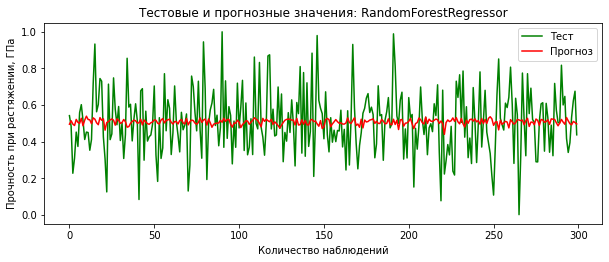

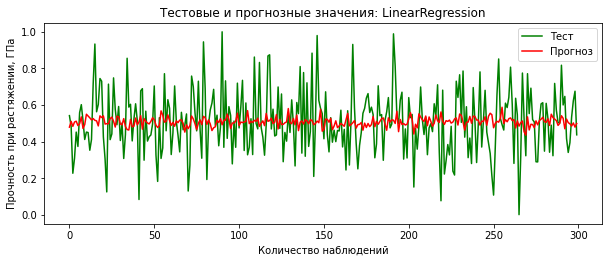

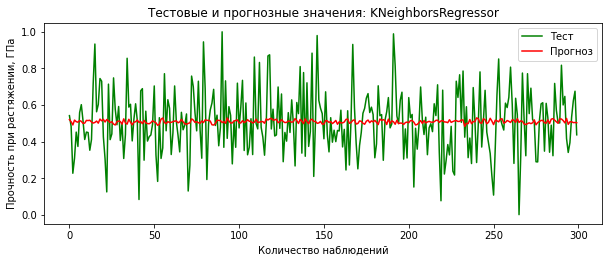

In [37]:
model_plot(Y_test_p.values, RFR_model_p.predict(X_test_p), 'Прочность при растяжении, ГПа', 'RandomForestRegressor')
model_plot(Y_test_p.values, LR_model_p.predict(X_test_p), 'Прочность при растяжении, ГПа', 'LinearRegression')
model_plot(Y_test_p.values, KNR_model_p.predict(X_test_p), 'Прочность при растяжении, ГПа', 'KNeighborsRegressor')

In [38]:
models

Model       MSE  R2 score
Модуль упругости при растяжении  RandomForestRegressor  0.029212 -0.003435
Модуль упругости при растяжении       LinearRegression  0.029524 -0.014159
Модуль упругости при растяжении    KNeighborsRegressor  0.028972  0.004800
Прочность при растяжении         RandomForestRegressor  0.029915  0.007942
Прочность при растяжении              LinearRegression  0.029801  0.011719
Прочность при растяжении           KNeighborsRegressor  0.030103  0.001691

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

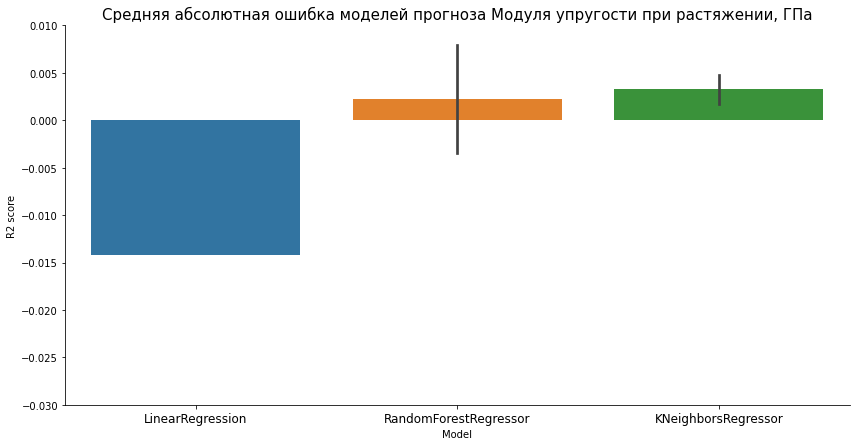

In [39]:
models_sort = models.sort_values(by=['R2 score'])
models_sort
sns.catplot(data=models_sort[0:5], x='Model', y='R2 score', kind='bar', height=6, aspect=2)
plt.ylim(ymin=-0.03, ymax=0.01)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Выводы: из графиков видно, что ни одна из моделей не справилась с задачей.
При этом хуже всего показывает себя метод ближайших соседей. Метод линейной регрессии и метод опорных векторов дают прогнозы, приближённые к простому усреднению.

## Нейронная сеть

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score


In [41]:
# Определим входы и выход для модели
df = df.astype(float)
target_var = df['Соотношение матрица-наполнитель']
train_vars = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(train_vars, target_var, test_size=0.3)

In [42]:

train_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      1023 non-null   float64
 1   модуль упругости, ГПа                 1023 non-null   float64
 2   Количество отвердителя, м.%           1023 non-null   float64
 3   Содержание эпоксидных групп,%_2       1023 non-null   float64
 4   Температура вспышки, С_2              1023 non-null   float64
 5   Поверхностная плотность, г/м2         1023 non-null   float64
 6   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 7   Прочность при растяжении, МПа         1023 non-null   float64
 8   Потребление смолы, г/м2               1023 non-null   float64
 9   Угол нашивки, град                    1023 non-null   float64
 10  Шаг нашивки                           1023 non-null   float64
 11  Плотность нашивки

In [43]:
target_var.info()

<class 'pandas.core.series.Series'>
Int64Index: 1023 entries, 0 to 1022
Series name: Соотношение матрица-наполнитель
Non-Null Count  Dtype  
--------------  -----  
1023 non-null   float64
dtypes: float64(1)
memory usage: 48.3 KB


In [44]:
# нормализация

x_train_normalizer = tf.keras.layers.Normalization(axis=-1)
x_train_normalizer.adapt(np.array(x_train))

In [45]:
# Сконфигурируем модель, зададим слои

model = tf.keras.Sequential([x_train_normalizer, layers.Dense(128, activation='relu'),
                                                 layers.Dense(128, activation='relu'),
                                                 layers.Dense(64, activation='relu'),                                        
                                                 layers.Dense(32, activation='relu'),
                                                 layers.Dense(1)
                                                ])

model.compile(optimizer=tf.keras.optimizers.Adamax(0.001), loss='mean_squared_error')   

In [46]:
# Архитектура модели

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                        

In [47]:
x_test

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
146       1949.423250             366.753804                    71.168798   
507       1890.091222             745.610657                   139.652424   
168       1968.953083            1190.019606                   115.237068   
678       2073.583894             995.548767                    70.719817   
113       1879.000705            1106.825749                   157.076488   
..                ...                    ...                          ...   
984       2008.874066            1076.741766                    81.927825   
93        1876.168046             560.960951                    63.511846   
183       1816.107716            1098.633655                   143.187762   
289       1825.270235             701.757944                   134.327676   
268       1926.530923            1064.104552                    98.406794   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
146                        23.554390                218.560836   
507                        24.208718                338.370780   
168                        24.486534                298.128902   
678                        23.917691                265.410701   
113                        17.089228                305.658635   
..                               ...                       ...   
984                        23.528344                320.803711   
93                         26.039089                289.494316   
183                        25.877519                295.978699   
289                        22.854517                338.558879   
268                        24.902076                271.126312   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
146                     793.018652                             73.017770   
507                     989.032623                             67.671879   
168                     416.220184                             72.342025   
678                     772.392973                             75.017148   
113                    1227.243097                             72.625213   
..                             ...                                   ...   
984                     547.908086                             72.848475   
93                      237.688172                             76.439841   
183                     375.591360                             72.814265   
289                     325.480693                             76.536875   
268                      87.685085                             77.748855   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  \
146                    2166.322407               208.483086   
507                    2852.310604               236.144388   
168                    2846.750285               141.978231   
678                    2837.073821               203.579610   
113                    1529.604423               208.945212   
..                             ...                      ...   
984                    2137.271408               204.086339   
93                     2155.862285               188.756824   
183                    2947.476671               196.914576   
289                    1529.828575               313.745171   
268                    1874.105009               241.148854   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
146                 0.0    11.502646          54.590868  
507                 0.0    10.904626          46.755741  
168                 0.0     9.338369          53.456507  
678                90.0     4.090984          60.577882  
113                 0.0     9.453269          52.391669  
..                  ...          ...                ...  
984                90.0     5.113644          61.998310  
93                  0.0     7.534357          37.495136  
183                 0.0    10.321628          53.604479  
289                 0.0     8.369185 

In [48]:
print(model.layers)

[<keras.layers.preprocessing.normalization.Normalization object at 0x0000021A45413EE0>, <keras.layers.core.dense.Dense object at 0x0000021A4564DEB0>, <keras.layers.core.dense.Dense object at 0x0000021A4564DE50>, <keras.layers.core.dense.Dense object at 0x0000021A4564DDF0>, <keras.layers.core.dense.Dense object at 0x0000021A4564D5B0>, <keras.layers.core.dense.Dense object at 0x0000021A4563E9D0>]


In [49]:
# Обучим модель

model_hist = model.fit(x_train, y_train, epochs=50, verbose=1, validation_split = 0.2)

Epoch 1/50
18/18 [==============================] - 0s 8ms/step - loss: 4.2400 - val_loss: 1.1888
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 1.4271 - val_loss: 1.1561
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 1.2118 - val_loss: 1.1009
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 1.1223 - val_loss: 1.0771
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0871 - val_loss: 1.0711
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0442 - val_loss: 1.0595
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0061 - val_loss: 1.0456
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9781 - val_loss: 1.0372
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9614 - val_loss: 1.0267
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9210 - val_loss: 1.0270
Epoch 11/50
18/18 [

In [50]:
# Потери модели

#model_hist.history
#models=models.drop([6, 7, 8, 9, 10, 11, 12, 13, 14])

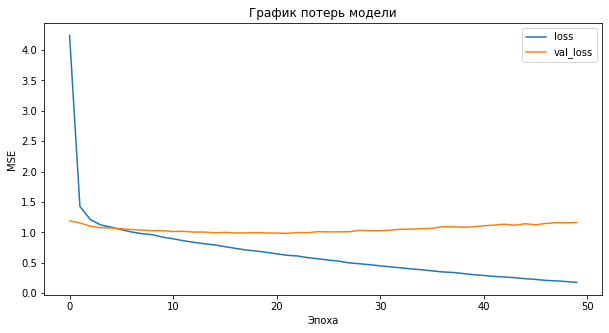

In [51]:
# Отрисовка потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize=(10,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('График потерь модели')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()
model_loss_plot(model_hist)

10/10 [==============================] - 0s 667us/step


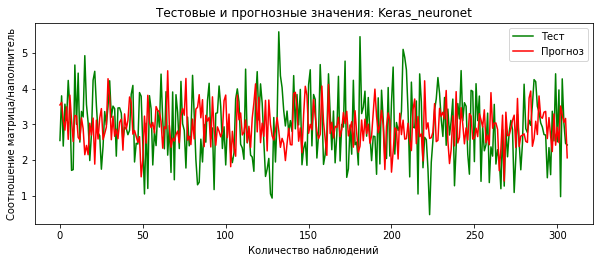

23/23 [==============================] - 0s 591us/step


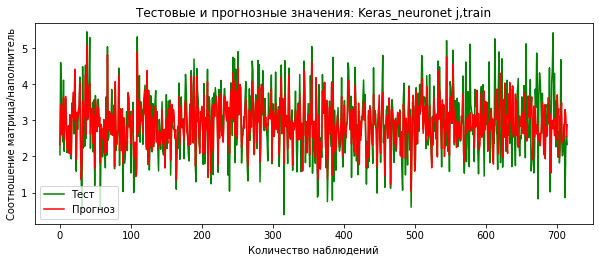

32/32 [==============================] - 0s 549us/step


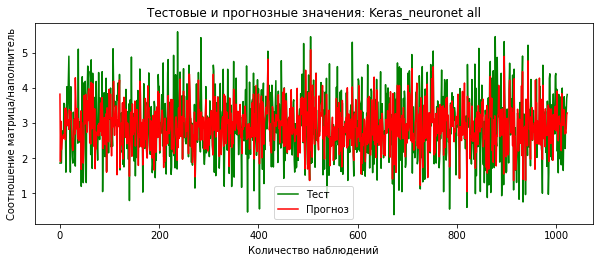

In [52]:
# Отрисуем результат работы модели

model_plot(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')
model_plot(y_train.values, model.predict(x_train.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet j,train')
model_plot(target_var.values, model.predict(train_vars.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet all')


In [53]:
# оценка модели MSE
model.evaluate(x_test, y_test, verbose=1)

10/10 [==============================] - 0s 684us/step - loss: 1.1598


1.1598014831542969

In [54]:
# Добавим ошибки модели в датасет с ошибками

MSE = mean_squared_error(y_test, model.predict(x_test.values))
R2 = r2_score(y_test, model.predict(x_test.values))

result = pd.DataFrame({'Model':'Keras_neuronet',\
                        #'target_var':['Соотношение матрица/наполнитель'],\
                        'MSE':[MSE],\
                        'R2 score':[R2]})
models = pd.concat([models, result], ignore_index=True)

# Добавим ошибки модели в датасет на трэйне

MSE = mean_squared_error(y_train, model.predict(x_train.values))
R2 = r2_score(y_train, model.predict(x_train.values))

result = pd.DataFrame({'Model':'Keras_neuronet tr',\
                        #'target_var':['Соотношение матрица/наполнитель'],\
                        'MSE':[MSE],\
                        'R2 score':[R2]})
models = pd.concat([models, result], ignore_index=True)

# Добавим ошибки модели в датасет на трэйне

MSE = mean_squared_error(target_var, model.predict(train_vars.values))
R2 = r2_score(target_var, model.predict(train_vars.values))

result = pd.DataFrame({'Model':'Keras_neuronet all',\
                        #'target_var':['Соотношение матрица/наполнитель'],\
                        'MSE':[MSE],\
                        'R2 score':[R2]})
models = pd.concat([models, result], ignore_index=True)
models

32/32 [==============================] - 0s 613us/step


Model       MSE  R2 score
0  RandomForestRegressor  0.029212 -0.003435
1       LinearRegression  0.029524 -0.014159
2    KNeighborsRegressor  0.028972  0.004800
3  RandomForestRegressor  0.029915  0.007942
4       LinearRegression  0.029801  0.011719
5    KNeighborsRegressor  0.030103  0.001691
6         Keras_neuronet  1.159801 -0.335002
7      Keras_neuronet tr  0.360304  0.559460
8     Keras_neuronet all  0.600231  0.279572

In [55]:
models

Model       MSE  R2 score
0  RandomForestRegressor  0.029212 -0.003435
1       LinearRegression  0.029524 -0.014159
2    KNeighborsRegressor  0.028972  0.004800
3  RandomForestRegressor  0.029915  0.007942
4       LinearRegression  0.029801  0.011719
5    KNeighborsRegressor  0.030103  0.001691
6         Keras_neuronet  1.159801 -0.335002
7      Keras_neuronet tr  0.360304  0.559460
8     Keras_neuronet all  0.600231  0.279572

In [56]:
# Сохраним модель для разработки веб-приложения для прогнозирования соотношения "матрица-наполнитель" в фреймворке Flask

model.save('keras_model')


INFO:tensorflow:Assets written to: keras_model\assets
